# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

complete = pd.merge(study_results, mouse_metadata, how = "left", on=["Mouse ID", "Mouse ID"]) 

# Display the data table for preview

complete


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [32]:
# Checking the number of mice.
miceno = len(mouse_metadata)
    
miceno

249

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = complete[complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()

duplicate





array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

row = complete["Mouse ID"] == "g989"

cleancom = complete[~row]

cleancom

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [35]:
# Checking the number of mice in the clean DataFrame.
micenum = cleancom["Mouse ID"].nunique()

micenum

248

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = cleancom.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean = "mean", median="median", variance="var", std="std", sem="sem"
).reset_index()

summary_statistics.set_index("Drug Regimen", inplace=True)

output = pd.DataFrame(summary_statistics)

new_headings = {
    "mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "variance": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err.",
}

output.rename(columns = new_headings, inplace = True)

output


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = cleancom.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean = "mean", median="median", variance="var", std="std", sem="sem"
).reset_index()

summary_statistics.set_index("Drug Regimen", inplace=True)

summary_statistics


,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '#of Observed Mouse Timepoints')

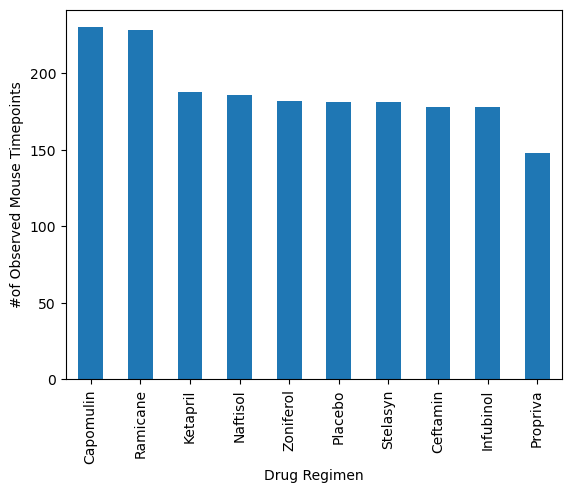

In [38]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drp = cleancom.groupby("Drug Regimen").size()

drp = drp.sort_values(ascending=False)

bar = drp.plot(kind="bar")
bar.set_xlabel("Drug Regimen")
bar.set_ylabel("#of Observed Mouse Timepoints")
 




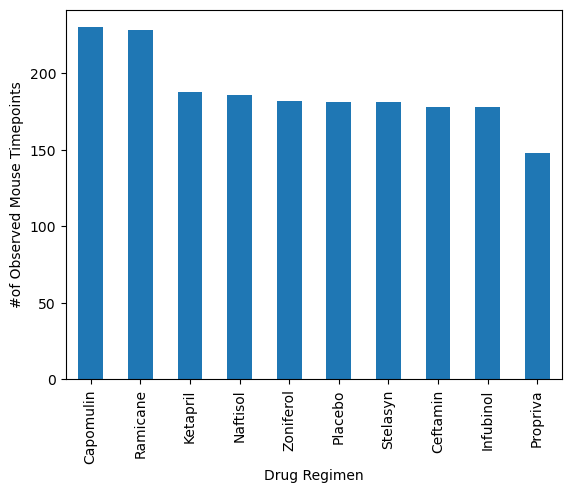

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drp = cleancom.groupby("Drug Regimen").size()

drp = drp.sort_values(ascending=False)

drp.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("#of Observed Mouse Timepoints")
plt.show()


Text(0, 0.5, 'Sex')

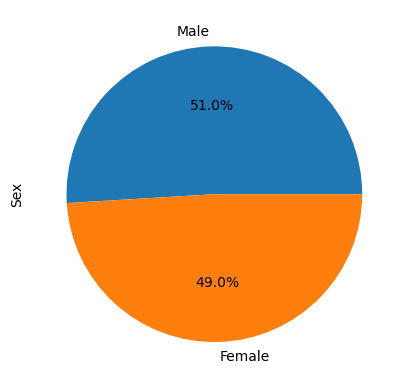

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fandm = cleancom["Sex"].value_counts()

ax = fandm.plot(kind="pie", autopct="%1.1f%%")
ax.set_ylabel("Sex") 


Text(0, 0.5, 'Sex')

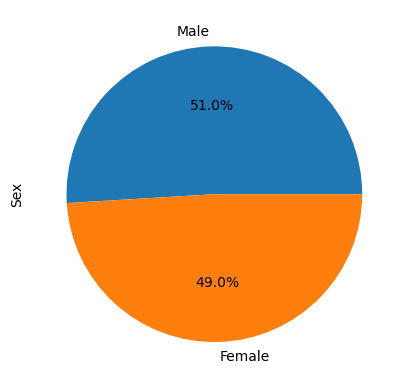

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fandm = cleancom["Sex"].value_counts()
pi = fandm.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#highest = pd.DataFrame(cleancom)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

clean = cleancom.query("Timepoint == 45")

clean = cleancom.drop_duplicates(subset="Mouse ID")





# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


mergecom = pd.merge(cleancom, clean, how = "left", on=["Mouse ID", "Mouse ID"]) 

mergecom


,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,0,45.0,0,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17,0,45.0,0,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,0,45.0,0,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30,0,45.0,0,Placebo,Female,21,30


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


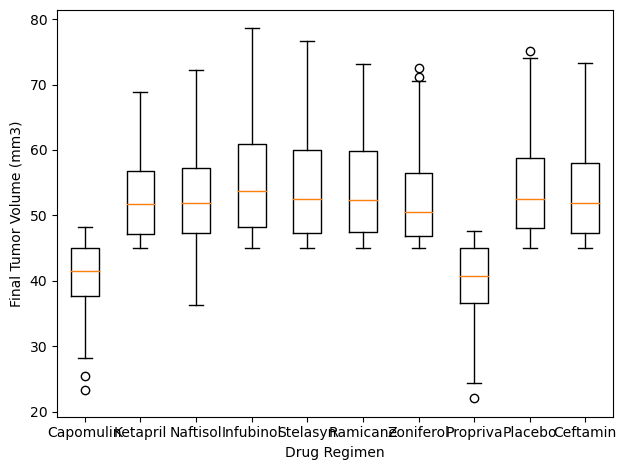

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumorvol = [group["Tumor Volume (mm3)"].values for _, group in df.groupby("Drug Regimen")]

plt.boxplot(tumorvol, labels=df["Drug Regimen"].unique())
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.tight_layout()


## Line and Scatter Plots

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

df = cleancom[cleancom["Drug Regimen"] == "Capomulin"]

tumorovol = df[capomulin_df["Mouse ID"] == g107]


plt.plot(tumorvol["Timepoint"], tumorvol["Tumor Volume (mm3)"], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.tight_layout()


NameError: name 'g107' is not defined

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
